In [1]:
# Packages for data loading, data analysis, and data preparation
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [18]:
# Packages for model evaluation and classification models
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
dataset = pd.read_csv('creditcard.csv')

## Exploratory Data Analysis

In [4]:
# shape
dataset.shape

(284807, 31)

In [5]:
class_names = {0:'Not Fraud', 1:'Fraud'}
print(dataset.Class.value_counts().rename(index = class_names))

Not Fraud    284315
Fraud           492
Name: Class, dtype: int64


Text(0, 0.5, 'Frequency')

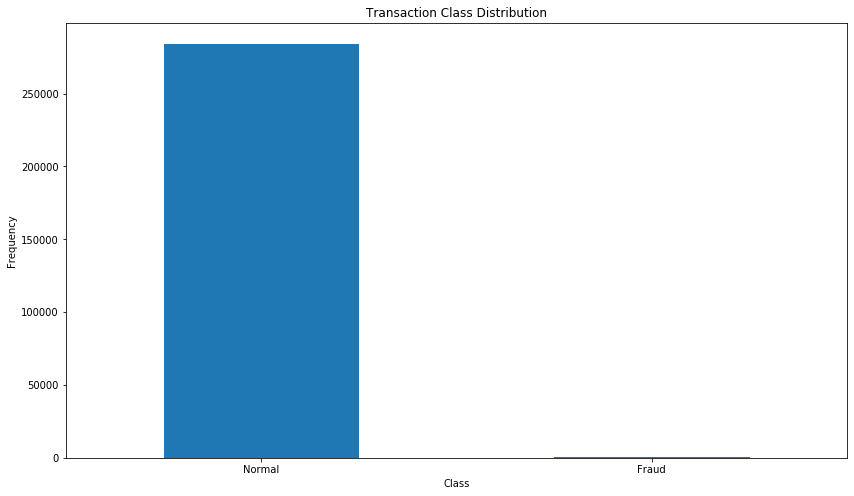

In [8]:
count_classes = pd.value_counts(dataset['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
labels = ["Normal", "Fraud"]

plt.title("Transaction Class Distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

Notice the stark imbalance of the data labels. Most of the transactions are nonfraud. If we use this dataset as the base for our modeling, most models will not place enough emphasis on the fraud signals; the nonfraud data points will drown out any weight the fraud signals provide.

As is, we may encounter difficulties modeling the prediction of fraud, with this imbalance leading the models to simply assume all transactions are nonfraud. This would be an unacceptable result.

Text(0.5, 1, 'Heatmap of Correlation')

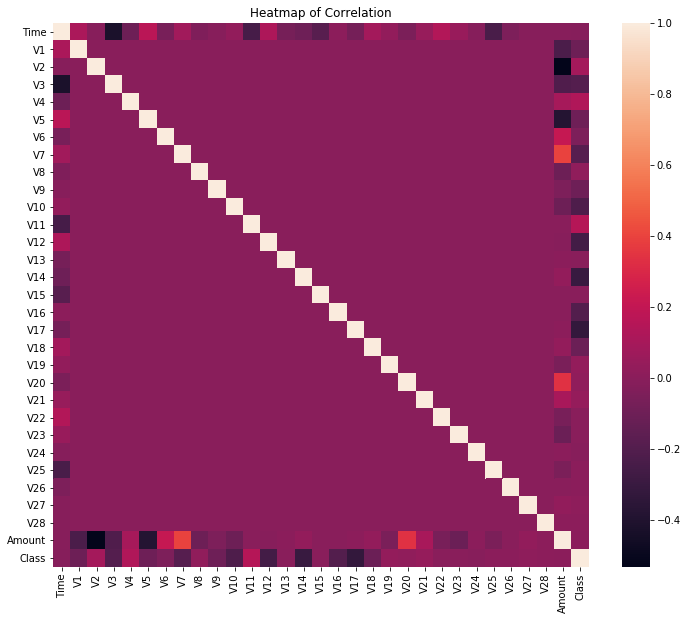

In [9]:
#heatmap
corr = dataset.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

We note that V1 to V28 has little to no correlation between each other.

## Model Evaluation

In [13]:
# reducing sample size for computational purposes
data = dataset.sample(frac=0.1, random_state = 1)

data.shape

(28481, 31)

In [111]:
# setting up train-test split and evaluation metrics
# create independent and Dependent Features
columns = dataset.columns.tolist()
# filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# store the variable we are predicting 
target = "Class"
# define a random state 
seed = 7
X = data[columns]
Y = data[target]
validation_size = 0.2
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [104]:
# test options for classification
num_folds = 10
scoring = 'accuracy'

In [112]:
# prepare model with best initial results
model = GradientBoostingClassifier()
model.fit(X_train, Y_train)

# estimate accuracy on validation set
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9989468141126909
[[5684    2]
 [   4    7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5686
           1       0.78      0.64      0.70        11

    accuracy                           1.00      5697
   macro avg       0.89      0.82      0.85      5697
weighted avg       1.00      1.00      1.00      5697



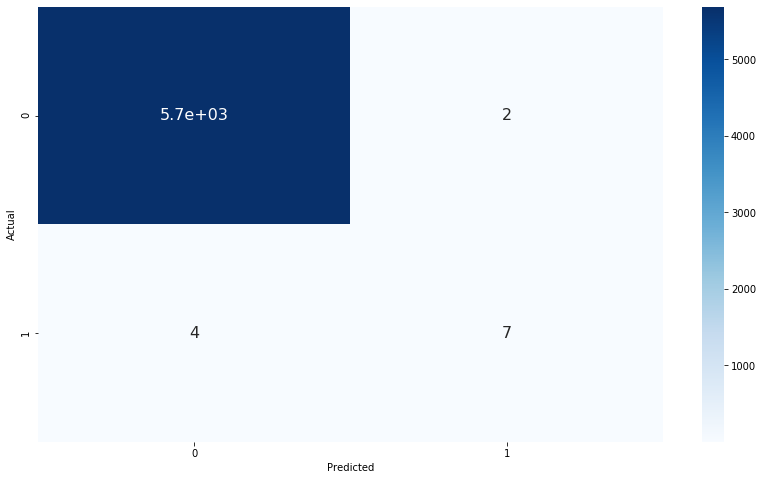

In [113]:
df_cm = pd.DataFrame(confusion_matrix(Y_validation, predictions), 
                     columns=np.unique(Y_validation), index = np.unique(Y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

In [23]:
# Grid Search: GradientBoosting Tuning
n_estimators = [20,180,1000]
max_depth= [2, 3, 5]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)
model = GradientBoostingClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.999034 using {'max_depth': 3, 'n_estimators': 20}


In [25]:
# prepare model with best initial results
model = GradientBoostingClassifier(max_depth= 3, n_estimators = 20)
model.fit(X_train, Y_train)

# estimate accuracy on validation set
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9989468141126909
[[5683    3]
 [   3    8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5686
           1       0.73      0.73      0.73        11

    accuracy                           1.00      5697
   macro avg       0.86      0.86      0.86      5697
weighted avg       1.00      1.00      1.00      5697



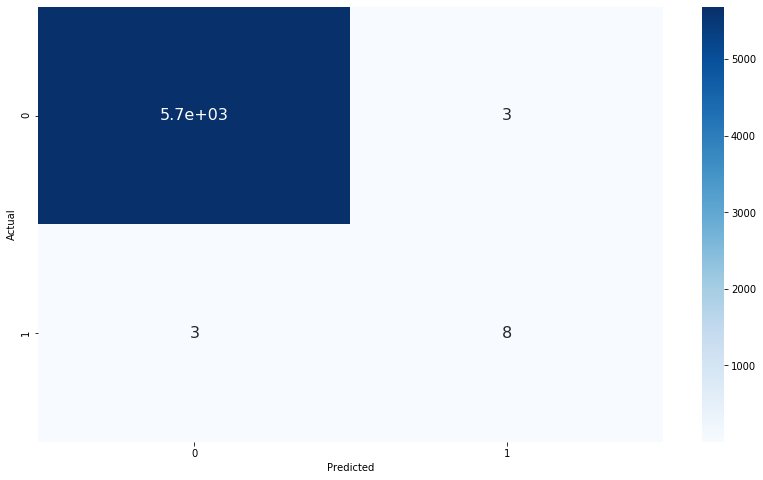

In [26]:
df_cm = pd.DataFrame(confusion_matrix(Y_validation, predictions), 
                     columns=np.unique(Y_validation), index = np.unique(Y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

In [24]:
# setting new scoring
scoring = 'recall'

# Grid Search: GradientBoosting Tuning
n_estimators = [20,180,1000]
max_depth= [2, 3, 5]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)
model = GradientBoostingClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

C:\Users\lauyu\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best: 0.699048 using {'max_depth': 3, 'n_estimators': 20}
#7 0.429048 (0.314640) with: {'max_depth': 2, 'n_estimators': 20}
#8 0.417381 (0.321647) with: {'max_depth': 2, 'n_estimators': 180}
#9 0.384048 (0.311188) with: {'max_depth': 2, 'n_estimators': 1000}
#1 0.699048 (0.194141) with: {'max_depth': 3, 'n_estimators': 20}
#4 0.520714 (0.274101) with: {'max_depth': 3, 'n_estimators': 180}
#3 0.526429 (0.273311) with: {'max_depth': 3, 'n_estimators': 1000}
#6 0.481429 (0.219778) with: {'max_depth': 5, 'n_estimators': 20}
#5 0.501429 (0.238003) with: {'max_depth': 5, 'n_estimators': 180}
#2 0.540714 (0.286187) with: {'max_depth': 5, 'n_estimators': 1000}


In [29]:
# model with best recall = best accuracy
# prepare model with second best initial results
model = GradientBoostingClassifier(max_depth= 5, n_estimators = 1000)
model.fit(X_train, Y_train)

# estimate accuracy on validation set
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9987712831314727
[[5684    2]
 [   5    6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5686
           1       0.75      0.55      0.63        11

    accuracy                           1.00      5697
   macro avg       0.87      0.77      0.82      5697
weighted avg       1.00      1.00      1.00      5697



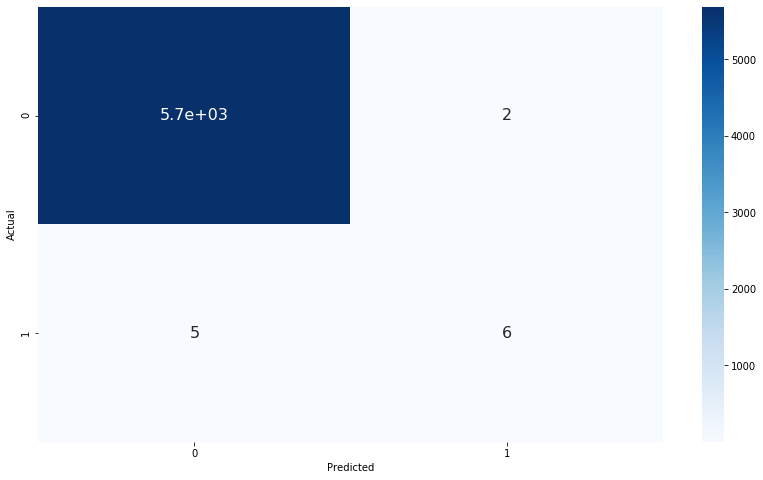

In [30]:
df_cm = pd.DataFrame(confusion_matrix(Y_validation, predictions), 
                     columns=np.unique(Y_validation), index = np.unique(Y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

In [56]:
dataset.loc[dataset['Class'] == 1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [ ]:
df = pd.concat([X_train, Y_train], axis=1)
# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
df_new = normal_distributed_df.sample(frac=1, random_state=42)
# split out validation dataset for the end
Y_train_new= df_new["Class"]
X_train_new = df_new.loc[:, dataset.columns != 'Class']

dataset.head()

In [106]:
# define a random state 
seed = 7
X = dataset[columns]
Y = dataset[target]
validation_size = 0.2
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

df = pd.concat([X_train, Y_train], axis=1)
# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:392]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
df_new = normal_distributed_df.sample(frac=1, random_state=42)
# split out validation dataset for the end
Y_train_new= df_new["Class"]
X_train_new = df_new.loc[:, dataset.columns != 'Class']

dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


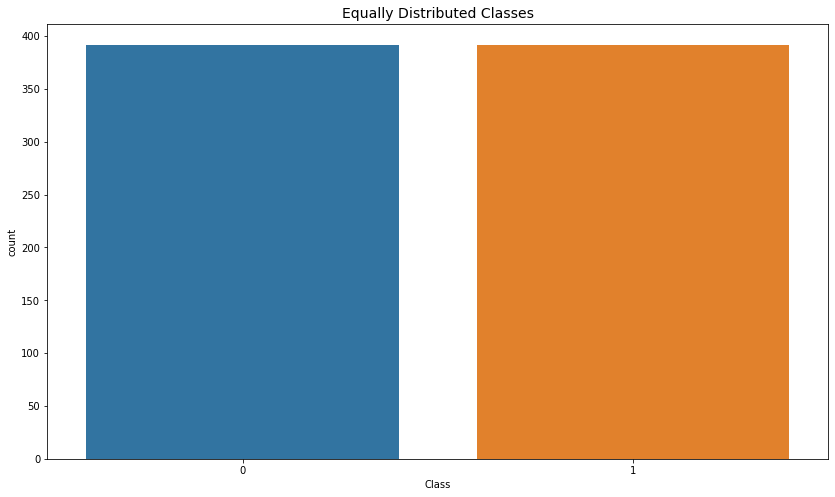

In [97]:
print('Distribution of the Classes in the subsample dataset')
print(df_new['Class'].value_counts()/len(df_new))
sns.countplot('Class', data=df_new)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [98]:
# given the data is balanced, the metric used here is accuracy
scoring='accuracy'

In [99]:
# Grid Search: GradientBoosting Tuning
'''
n_estimators : int (default=100)
    The number of boosting stages to perform. 
    Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
max_depth : integer, optional (default=3)
    maximum depth of the individual regression estimators. 
    The maximum depth limits the number of nodes in the tree. 
    Tune this parameter for best performance; the best value depends on the interaction of the input variables.

''' 
n_estimators = [20,180,1000]
max_depth= [2, 3, 5]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)
model = GradientBoostingClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train_new, Y_train_new)

# reset lists
means = []
stds = []
params = []
ranks = []

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

C:\Users\lauyu\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best: 0.940036 using {'max_depth': 3, 'n_estimators': 180}
#8 0.927264 (0.024335) with: {'max_depth': 2, 'n_estimators': 20}
#4 0.936190 (0.028584) with: {'max_depth': 2, 'n_estimators': 180}
#7 0.932392 (0.029113) with: {'max_depth': 2, 'n_estimators': 1000}
#3 0.937472 (0.027664) with: {'max_depth': 3, 'n_estimators': 20}
#1 0.940036 (0.025568) with: {'max_depth': 3, 'n_estimators': 180}
#2 0.940019 (0.027446) with: {'max_depth': 3, 'n_estimators': 1000}
#9 0.923466 (0.020578) with: {'max_depth': 5, 'n_estimators': 20}
#5 0.933642 (0.022003) with: {'max_depth': 5, 'n_estimators': 180}
#6 0.933625 (0.028495) with: {'max_depth': 5, 'n_estimators': 1000}


In [100]:
# prepare model
model = GradientBoostingClassifier(max_depth= 3, n_estimators = 180)
model.fit(X_train_new, Y_train_new)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=180,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [101]:
# estimate accuracy on Original validation set
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9631684280748569
[[54771  2091]
 [    7    93]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56862
           1       0.04      0.93      0.08       100

    accuracy                           0.96     56962
   macro avg       0.52      0.95      0.53     56962
weighted avg       1.00      0.96      0.98     56962



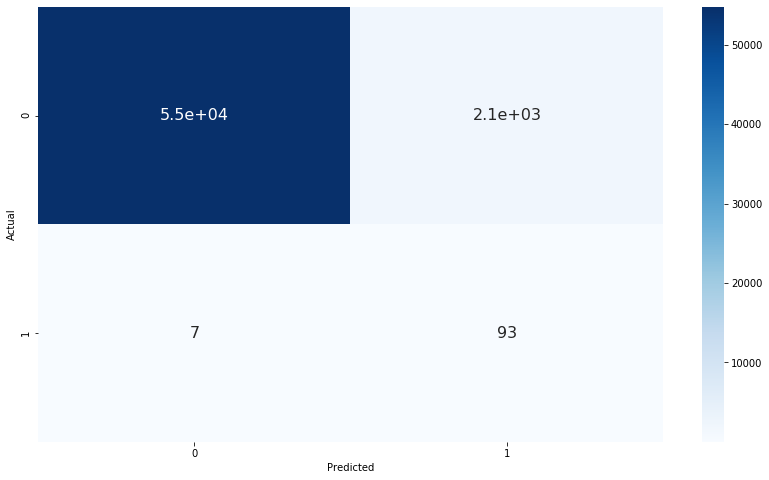

In [102]:
df_cm = pd.DataFrame(confusion_matrix(Y_validation, predictions), 
                     columns=np.unique(Y_validation), index = np.unique(Y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

## Outlier Detection Models

In [120]:
# Determine number of fraud cases in dataset

Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0017234102419808666
Fraud Cases: 49
Valid Transactions: 28432


In [121]:
# Define a random state 
state = np.random.RandomState(42)
X = data[columns]
Y = data["Class"]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))

In [126]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

# define random states
seed = 1

# define outlier detection tools to be compared
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination=outlier_fraction,
                                        random_state=seed),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20,
                                               contamination=outlier_fraction),
    "Support Vector Machine": OneClassSVM()
}

In [127]:
# Fit the model
plt.figure(figsize=(16, 12))
n_outliers = len(Fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    # Reshape the prediction values to 0 for valid, 1 for fraud. 
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()
    
    # Run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

Isolation Forest: 71
0.99750711000316
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.28      0.29      0.28        49

    accuracy                           1.00     28481
   macro avg       0.64      0.64      0.64     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: 97
0.9965942207085425
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481

Support Vector Machine: 14238
0.5000877778167901
              precision    recall  f1-score   support

           0       1.00      0.50      0.67     28432
           1       0.00      0.53      0.00        49

    accuracy                           0.50     284

<Figure size 1152x864 with 0 Axes>

In [128]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [130]:
Y

169876    0
127467    0
137900    0
21513     0
134700    0
         ..
2032      0
240932    0
3701      0
153365    0
97365     0
Name: Class, Length: 28481, dtype: int64

In [129]:
y_pred != Y

169876    False
127467    False
137900    False
21513      True
134700    False
          ...  
2032       True
240932     True
3701       True
153365    False
97365     False
Name: Class, Length: 28481, dtype: bool